<small><i>Dit document bevat een voorbeeld van het uitwerken van een data science opdracht. Dit voorbeeld gebruiken we in het eerste college van het vak Computational Modeling.</i></small>


# Introductie - autoverzekering

Een autoverzekeraar wil met risk-based pricing gaan werken. Klanten met een hoger risico op het rijden van schade moeten meer premie gaan betalen dan klanten met een lager risico. Om te kunnen bepalen wat de kenmerken zijn van een klant met een hoog risico en een klant met een laag risico wordt gegekeken naar data uit het verleden, waarin kenmerken van een klant vastgelegd zijn, samen met de eventuele gereden schade. 

## De data
Om de opdracht uit te voeren zijn de volgende gegevens nodig:
- Gegevens van klanten van de verzekeraar
- Gegevens over of ze wel of niet schade gereden hebben

Deze gegevens zijn verzameld in het excelbestand autoverzekering.xlsx

(Merk op: deze dataset is fictief, maar is gebaseerd op een echte casus)

## Opdracht

Open het excelbestand en bekijk de data eens goed. Kun je zelf al bepaalde kenmerken van klanten vinden die van invloed zijn op het rijden van schade? Kun je een zo goed mogelijk onderbouwd advies geven aan de verstrekker van de verzekering?

## Data inlezen
De aangeleverde gegevens in het excel databestand dienen omgevormd te worden tot een bruikbare vorm: een dataframe.

Hiervoor maken we gebruik van de Python Pandas bibliotheek.

In [1]:
#importeer de library
import pandas as pd

In [2]:
# lees het excel bestand in met pd.read_xlsx, zie: https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html
df = pd.read_excel('autoverzekering.xlsx')
# Toon de ingelezen inhoud
df

,Leeftijd,AantalJaarRijbewijs,Woonplaats,KleurAuto,SchadeAfgelopenJaar
0,18,1,Amsterdam,Rood,Ja
1,19,1,Utrecht,Zwart,Nee
2,20,1,Eindhoven,Blauw,Nee
3,21,1,Amsterdam,Blauw,Ja
4,22,1,Utrecht,Rood,Nee
5,23,5,Eindhoven,Zwart,Nee
6,24,5,Amsterdam,Zwart,Ja
7,25,5,Utrecht,Blauw,Nee
8,26,5,Eindhoven,Rood,Ja
9,27,5,Amsterdam,Rood,Ja


Als het goed is komt dit overeen met het databestand dat je zelf al bekeken hebt.

## Data verkennen

Laten we een paar plotjes maken om de data beter te bekijken, hiervoor maken we gebruik van het visualisatie package seaborn. 

In [3]:
import seaborn as sns

<Axes: xlabel='AantalJaarRijbewijs', ylabel='count'>

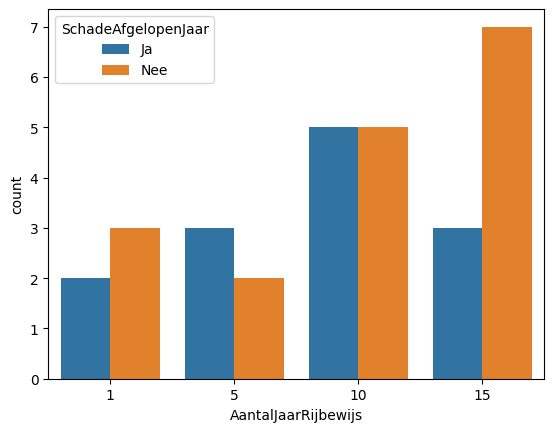

In [4]:
#Is er een relatie tussen Woonplaats en het rijden van schade?
sns.countplot(df, x='AantalJaarRijbewijs',hue='SchadeAfgelopenJaar')

<Axes: xlabel='Woonplaats', ylabel='count'>

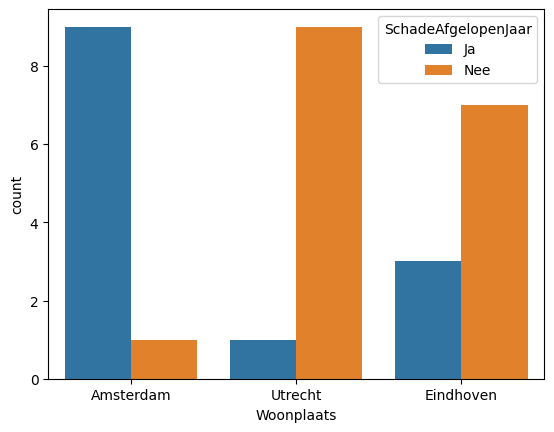

In [5]:
#Is er een relatie tussen Woonplaats en het rijden van schade?
sns.countplot(df, x='Woonplaats',hue='SchadeAfgelopenJaar')

<Axes: xlabel='KleurAuto', ylabel='count'>

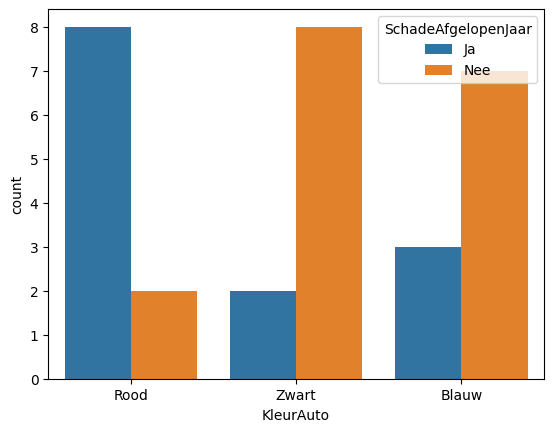

In [6]:
#Is er een relatie tussen de kleur van de auto en het rijden van schade?
sns.countplot(df, x='KleurAuto',hue='SchadeAfgelopenJaar')

Om te bekijken of er een relatie is tussen de leeftijd van de bestuurder en het rijden van schade, moeten we de data nog wat bewerken. We kunnen bijvoorbeeld gebruik maken van *bins*, waarbij we de leeftijd indelen in de intervallen 'jonger dan 20', '20 tot 30', '30 tot 40', 'ouder dan 40'. Je kunt uiteraard ook voor andere intervallen kiezen.


In [7]:
#we voegen de kolom leeftijd_bins toe aan het dataframe
df['leeftijd_bins'] = pd.cut(df['Leeftijd'], bins =[0,10,20,30,40,50])
#even kijken wat dat oplevert:
df.head()

,Leeftijd,AantalJaarRijbewijs,Woonplaats,KleurAuto,SchadeAfgelopenJaar,leeftijd_bins
0,18,1,Amsterdam,Rood,Ja,"(10, 20]"
1,19,1,Utrecht,Zwart,Nee,"(10, 20]"
2,20,1,Eindhoven,Blauw,Nee,"(10, 20]"
3,21,1,Amsterdam,Blauw,Ja,"(20, 30]"
4,22,1,Utrecht,Rood,Nee,"(20, 30]"


<Axes: xlabel='leeftijd_bins', ylabel='count'>

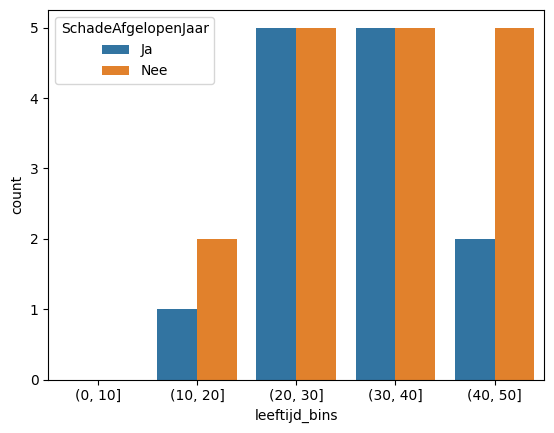

In [8]:
#nu kunnen we de plot maken om te kijken of leeftijd invloed heeft op het rijden van schade
sns.countplot(df, x='leeftijd_bins',hue='SchadeAfgelopenJaar')

Dit geeft al een mooi overzicht van de data. Maar om een goed advies te kunnen geven aan de autoverzekeraar willen we een beslisboom maken die hij kan gebruiken om bij een nieuwe klant direct een indeling te maken in 'laag risico', wat we overeen laten komen met 'SchadeAfgelopenJaar'==Nee en 'hoog risico', wat we overeen laten komen met 'SchadeAfgelopenJaar'==Ja.
We gaan hierbij gebruik maken van de library scikit-learn, en dan met name de module tree, zie: https://scikit-learn.org/stable/modules/tree.html

We halen een paar klanten uit ons dataframe, zodat we nadat we een beslisboom gemaakt hebben kunnen controleren of we met de beslisboom een goed voorspelling maken. Dit noemen we het splitsen in een train en een test set.

## Data preparatie

Om gebruik te kunnen maken van de module tree van sklearn zullen we eerst de data wat moeten bewerken. Deze module kan namelijk niet omgaan met categorische data zoals 'Woonplaats' of 'KleurAuto'. Deze gaan we dus even omzetten naar een ander type.

In [9]:
#We selecteren de kolommen die wel al uit integers bestaan
X_numeric = df[['Leeftijd','AantalJaarRijbewijs']]
#Vervolgens zetten we de andere kolommen om naar integers
X_dummies = pd.get_dummies(df[['Woonplaats', 'KleurAuto']], dtype = int)
#We plakken de twee dataframes weer aan elkaar
X = pd.concat([X_numeric, X_dummies], axis = 1)

In [10]:
#Zo ziet ons nieuwe dataframe eruit. Bestudeer zelf goed of je begrijpt wat er veranderd is.
X

,Leeftijd,AantalJaarRijbewijs,Woonplaats_Amsterdam,Woonplaats_Eindhoven,Woonplaats_Utrecht,KleurAuto_Blauw,KleurAuto_Rood,KleurAuto_Zwart
0,18,1,1,0,0,0,1,0
1,19,1,0,0,1,0,0,1
2,20,1,0,1,0,1,0,0
3,21,1,1,0,0,1,0,0
4,22,1,0,0,1,0,1,0
5,23,5,0,1,0,0,0,1
6,24,5,1,0,0,0,0,1
7,25,5,0,0,1,1,0,0
8,26,5,0,1,0,0,1,0
9,27,5,1,0,0,0,1,0


Merk ook op dat we enkel de kolommen over hebben gehouden met klantgegevens die bij inschrijving bekend zijn, dit zijn namelijk de gegevens die we willen gebruiken om de voorspelling te doen. Dit noemen we ook wel de predictoren of de onafhankelijke variabelen.

De kolom 'SchadeAfgelopenJaar' hebben we eruit gelaten, dat is namelijk het gegeven dat we willen voorspellen. De zogenoemde target-variabele of afhankelijke variabele. Gebruikelijk is om deze target-variabele toe te wijzen aan een variabele genaamd y.

In [11]:
y = df[['SchadeAfgelopenJaar']]

Nu zijn we bijna klaar om de beslisboom te maken. Maar voordat we dat doen gaan we eerst een paar rijen uit de dataset halen. Deze kunnen we dan als we de beslisboom gemaakt hebben gebruiken om te controleren of de beslisboom voor deze klanten tot de juiste conclusie zou zijn gekomen.
Het dataframe dat we gaan gebruiken om de beslisboom te maken noemen we de *train set*, de data die we gebruiken voor controle noemen we de *test set*.

In [12]:
#We gebruiken numpy om random integers te genereren op basis waarvan we de rijen voor de test set selecteren.
import numpy as np
test_index = np.random.randint(0,30,size = 6)
test_index

array([12, 25, 11, 19, 18,  6])

In [13]:
#We gebruiken test_index om de train en de test set te genereren
X_test = X.iloc[test_index]
y_test = y.iloc[test_index]

X_train = X.drop(test_index)
y_train = y.drop(test_index)

In [14]:
#bekijk de dataframes om te zien of het goed is gegaan (controleer zelf eventueel de anderen)
X_test

,Leeftijd,AantalJaarRijbewijs,Woonplaats_Amsterdam,Woonplaats_Eindhoven,Woonplaats_Utrecht,KleurAuto_Blauw,KleurAuto_Rood,KleurAuto_Zwart
12,30,10,1,0,0,1,0,0
25,43,15,0,0,1,1,0,0
11,29,10,0,1,0,1,0,0
19,37,10,0,0,1,0,0,1
18,36,10,1,0,0,0,1,0
6,24,5,1,0,0,0,0,1


## Modelleren

Nu zijn we helemaal klaar voor het maken van de beslisboom. 

In [15]:
#importeer het juiste package
from sklearn import tree

In [16]:
#generereer een Decision Tree Classifier
clf = tree.DecisionTreeClassifier()
#train de classifier op de train en test set met behulp van de .fit method
clf.fit(X_train,y_train)

DecisionTreeClassifier()

## Evaluatie

De beslisboom is nu gegenereerd, maar dit geeft ons nog weinig informatie. Laten we eens kijken wat deze beslisboom voor voorspelling zou doen op onze test set.

Eerst maar eens kijken hoe de eerste rij van de test set eruit ziet:

In [17]:
X_test.iloc[[0]]

,Leeftijd,AantalJaarRijbewijs,Woonplaats_Amsterdam,Woonplaats_Eindhoven,Woonplaats_Utrecht,KleurAuto_Blauw,KleurAuto_Rood,KleurAuto_Zwart
12,30,10,1,0,0,1,0,0


In [18]:
clf.predict(X_test.iloc[[0]])

array(['Ja'], dtype=object)

We zien hier dat de beslisboom voor deze klant voorspelt dat hij in de hoog risico-groep zou vallen. Eens kijken of hij ook echt schade gereden heeft:

In [19]:
y_test.iloc[[0]]

,SchadeAfgelopenJaar
12,Ja


Dit is dus goed voorpeld!

In [20]:
#En voor de volgende klanten in de testset?
for i in range(0, X_test.shape[0]):
    print('Bekijk rij nummer {}'.format(i))
    print('Voorspelling voor deze klant: {}'.format(clf.predict(X_test.iloc[[i]])))
    print('Werkelijke waarde voor deze klant: {}'.format(y_test['SchadeAfgelopenJaar'].iloc[i]))
    print('')

Bekijk rij nummer 0
Voorspelling voor deze klant: ['Ja']
Werkelijke waarde voor deze klant: Ja

Bekijk rij nummer 1
Voorspelling voor deze klant: ['Nee']
Werkelijke waarde voor deze klant: Nee

Bekijk rij nummer 2
Voorspelling voor deze klant: ['Nee']
Werkelijke waarde voor deze klant: Nee

Bekijk rij nummer 3
Voorspelling voor deze klant: ['Nee']
Werkelijke waarde voor deze klant: Nee

Bekijk rij nummer 4
Voorspelling voor deze klant: ['Ja']
Werkelijke waarde voor deze klant: Ja

Bekijk rij nummer 5
Voorspelling voor deze klant: ['Ja']
Werkelijke waarde voor deze klant: Ja



Vind je dat deze beslisboom goede voorspellingen doet?

Om een beter beeld te krijgen waarop de beslissingen gebaseerd kunnen we de beslisboom visualiseren. Bekijk goed hoe de beslissing gemaakt wordt en kijk ook eens of je op basis hiervan kunt verklaren waarom een van de klanten in de test set het verkeerde label kreeg.

[Text(0.4444444444444444, 0.9166666666666666, 'Woonplaats_Amsterdam <= 0.5\ngini = 0.486\nsamples = 24\nvalue = [10, 14]\nclass = Ja'),
 Text(0.2222222222222222, 0.75, 'KleurAuto_Rood <= 0.5\ngini = 0.36\nsamples = 17\nvalue = [4, 13]\nclass = Ja'),
 Text(0.3333333333333333, 0.8333333333333333, 'True  '),
 Text(0.1111111111111111, 0.5833333333333334, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]\nclass = Ja'),
 Text(0.3333333333333333, 0.5833333333333334, 'Woonplaats_Utrecht <= 0.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]\nclass = Nee'),
 Text(0.2222222222222222, 0.4166666666666667, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = Nee'),
 Text(0.4444444444444444, 0.4166666666666667, 'Leeftijd <= 26.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = Ja'),
 Text(0.3333333333333333, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Ja'),
 Text(0.5555555555555556, 0.25, 'Leeftijd <= 35.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Nee'),
 Text(0.4444444444444444, 0.083333333

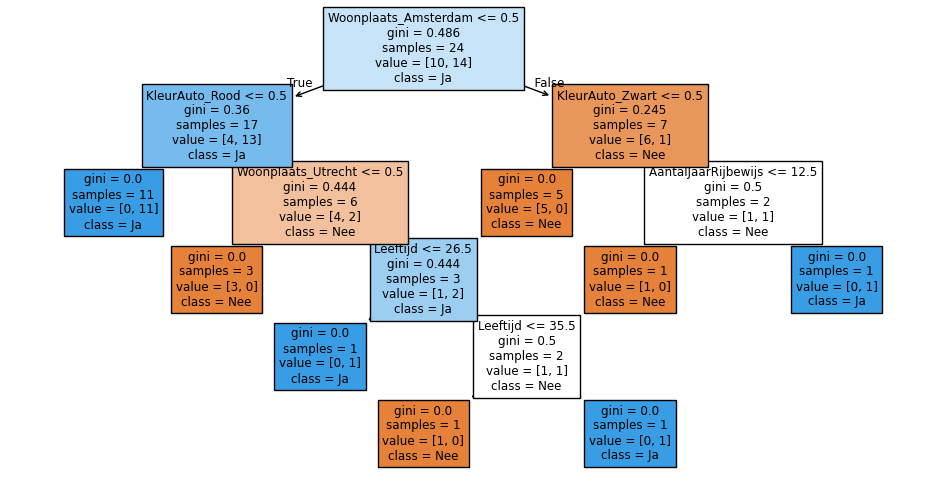

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
tree.plot_tree(clf, feature_names = X.columns, class_names = ['Nee','Ja'], filled = True)

<b> Einde </b>